# Problem1

### (1) Solve the d-degree polynomial regression problems with d = 0, 1, 2, 3, 4. Show the data points and all your regressed curves in one plot.

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import math
import statistics

x_train = np.array([0, 2, 3, 5])
y_train = np.array([1, 4, 9, 16])
x_test = np.array([[1], [4]])
y_test = np.array([[3], [12]])

In [19]:
class Polynomial_Model:
    b0=0
    b1=0
    b2=0
    b3=0
    b4=0
    degree=0
    def __init__(self, degree):
        self.degree = degree
    
    
    def train(self,  x, y):
        if(self.degree == 0):
            self.b0 = np.mean(y)
        elif(self.degree == 1):
            self.b0 = np.mean(y-x)
            self.b1 = 1
        elif(self.degree == 2):
            x_sqrt_mean = np.mean(x**2)
            x_sqrt_sum = np.sum(x**2)
            
            self.b2 = 1
            self.b1 = (-np.dot(y, x)+(np.mean(y)-np.mean(x**2))*np.sum(x)+np.sum(x**3))/(np.mean(x)*np.sum(x)-np.sum(x**2))
            self.b0 = np.mean(y)-self.b1*np.mean(x)-x_sqrt_mean
        elif(self.degree == 3):
            kk,jj = curve_fit(func_3, x, y)
            self.b0 = kk[0]
            self.b1 = kk[1]
            self.b2 = kk[2]
            self.b3 = 1
        elif(self.degree == 4):
            kk,jj = curve_fit(func_4, x, y)
            self.b0 = kk[0]
            self.b1 = kk[1]
            self.b2 = kk[2]
            self.b3 = kk[3]
            self.b4 = 1
    
    
    def predict(self, x):
        if(self.degree == 0):
            return self.b1*x+self.b0
        elif(self.degree == 1):
            return self.b1*x+self.b0
        elif(self.degree == 2):
            return self.b2*(x**2)+self.b1*x+self.b0
        elif(self.degree == 3):
            return self.b3*(x**3)+self.b2*(x**2)+self.b1*x+self.b0
        elif(self.degree == 4):
            return self.b4*(x**4)+self.b3*(x**3)+self.b2*(x**2)+self.b1*x+self.b0

In [20]:
def func_3(x, a0, a1, a2):
    return a0+a1*x+a2*(x**2)+(x**3)
def func_4(x, a0, a1, a2, a3):
    return a0+a1*x+a2*(x**2)+a3*(x**3)+(x**4)
def RSS(y, y_hat):
    rss=0
    for i in range(len(y)):
        rss = rss+(y[i]-y_hat[i])**2
    return rss

In [21]:
pm0 = Polynomial_Model(0)
pm1 = Polynomial_Model(1)
pm2 = Polynomial_Model(2)
pm3 = Polynomial_Model(3)
pm4 = Polynomial_Model(4)

In [22]:
pm0.train(x_train, y_train)
pm1.train(x_train, y_train)
pm2.train(x_train, y_train)
pm3.train(x_train, y_train)
pm4.train(x_train, y_train)

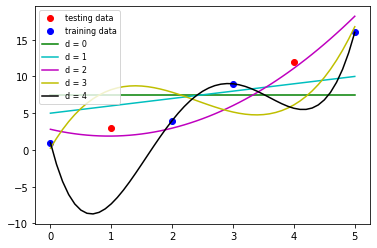

In [23]:
plt.plot(x_test, y_test, 'ro', label ='testing data')
plt.plot(x_train, y_train, 'bo', label ='training data')
t= np.array([[i/10] for i in range(51)])
plt.plot(t, pm0.predict(t), 'g', label ='d = 0')
plt.plot(t, pm1.predict(t), 'c', label ='d = 1')
plt.plot(t, pm2.predict(t), 'm', label ='d = 2')
plt.plot(t, pm3.predict(t), 'y', label ='d = 3')
plt.plot(t, pm4.predict(t), 'k', label ='d = 4')
plt.legend(loc='upper left', prop={'size': 8})
plt.show()

### (2) For each d, calculate the typical (squared) bias, variance, total error, training error and test error. Then, draw a plot of the above five curves as we go from simpler model to more complex model.

In [24]:
def cal_rss(pred, ground):
    ret = 0
    for i in range(len(pred)):
        ret += (pred[i]-ground[i])**2
    return ret
def cal_variance(x):
    return np.var(x)
def cal_error(x, y):
    return cal_variance(x)+cal_bias(x, y)**2
def cal_bias(x, y):
    ret = 0
    for i in range(len(x)):
        ret+= np.abs(x[i]-y[i])
    return ret/len(x)

In [25]:
bias_sqrt = [ 
        cal_bias(pm1.predict(x_train), y_train)**2, 
        cal_bias(pm2.predict(x_train), y_train)**2, 
        cal_bias(pm3.predict(x_train), y_train)**2, 
        cal_bias(pm4.predict(x_train), y_train)**2]

In [26]:
var = [ 
       cal_variance(pm1.predict(x_train)),
       cal_variance(pm2.predict(x_train)), 
       cal_variance(pm3.predict(x_train)),
       cal_variance(pm4.predict(x_train))]

In [27]:
train_err = [
         cal_error(pm1.predict(x_train), y_train),
         cal_error(pm2.predict(x_train), y_train),
         cal_error(pm3.predict(x_train), y_train),
         cal_error(pm4.predict(x_train), y_train)]

In [28]:
test_err = [
         cal_error(pm1.predict(x_test), y_test),
         cal_error(pm2.predict(x_test), y_test),
         cal_error(pm3.predict(x_test), y_test),
         cal_error(pm4.predict(x_test), y_test)]

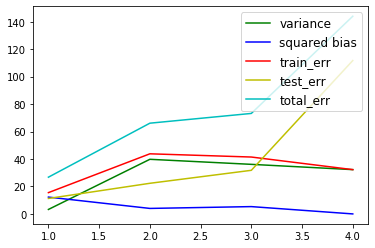

In [29]:
plt.plot([1,2,3,4], var, 'g', label ='variance')
plt.plot([1,2,3,4], bias_sqrt, 'b', label ='squared bias')
plt.plot([1,2,3,4], train_err, 'r', label ='train_err')
plt.plot([1,2,3,4], test_err, 'y', label ='test_err')
plt.plot([1,2,3,4], [train_err[i]+test_err[i] for i in range(len(train_err))], 'c', label ='total_err')
plt.legend(loc='upper right', prop={'size': 12})
plt.show()

### (3) Explain why each of the five curves has the shape displayed in part (2).

In problem(2), I plot the sqaured bias values and variance values based on the prediction of training set points.
Since the curves with higher dimension fit the training point more, the squared bias values goes down when dimension goes high.

To be noticed, the training error goes higher when it comes to higher dimension. This is because that the regression function becomes overfitting to the training points. We can also get this conclusion from the plot in problem(1), though the d=4 curve fits training points a lot, it cannot precisely predict testing points.

### (4) In this part we want to implement linear regression.

In this part of the implementation, I defined a cost_function which calls numpy.linalg.norm to calculate the loss value. And the loss output is delivered to scipy.optimize.minimize function to calculate the coefficients.

I used sklearn.model_selection.KFold to do training set and testing set seperation for me. KFold.split() function returns the indexs of training points and testing points. To be noticed that we can decide whether shuffle the data or not before splitting into batches.

As we can see from the result, the training results of linear regression with L1-norm and L2-norm have no significant difference. However, we can notice that the RSS score of each fold is very different from each other. I suspect that it's because I choosed not to shuffle the dataset before splitting, I have tried cv with shuffling, and the difference between the RSS score of each fold became smaller. Hence, I conclude that the 'Lag1','Lag2' values in the dataset in each part has different characteristics.

In [27]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy.optimize import minimize
from sklearn.model_selection import KFold

def cost_function(params, X, y, p):
    error_vector = y - np.dot(X, params)
    return np.linalg.norm(error_vector, ord=p)

df = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
X = df[['Lag1','Lag2']]
y = df['Today']

In [28]:
reg_l1 = minimize(cost_function, [0.5,0.5], args=(X.values, y.values, 1))
reg_l2 = minimize(cost_function, [0.5,0.5], args=(X.values, y.values, 2))

In [29]:
def fit(X, params):
    return X.dot(params)

In [34]:
def cross_validation( X, y, cv):
    #Here we can discuss the diff between shuffle and non-shuffle
    kf = KFold(n_splits=cv,shuffle=False)
    rss1=0
    rss2=0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        reg_l1 = minimize(cost_function, [0.5,0.5], args=(X_train, y_train, 1))
        reg_l2 = minimize(cost_function, [0.5,0.5], args=(X_train, y_train, 2))
        
        tmp = cal_rss(fit(X_test, reg_l1.x), y_test)
        print("L1 norm cv RSS:")
        print(tmp)
        rss1+=tmp
        tmp = cal_rss(fit(X_test, reg_l2.x), y_test)
        print("L2 norm cv RSS:")
        print(tmp) 
        rss2+=tmp
    print("Mean RSS of cross validation")
    print(rss1/cv)
    print(rss2/cv)

In [35]:
cross_validation( X.values, y.values, 5)

L1 norm cv RSS:
422.8361149664075
L2 norm cv RSS:
421.627977427969
L1 norm cv RSS:
697.743646789782
L2 norm cv RSS:
695.6391042661398
L1 norm cv RSS:
269.2481590881537
L2 norm cv RSS:
272.1310003625963
L1 norm cv RSS:
123.52338619172684
L2 norm cv RSS:
123.34939659041774
L1 norm cv RSS:
102.51181546850891
L2 norm cv RSS:
102.90499363188384
Mean RSS of cross validation
323.1726245009158
323.13049445580134
